In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install medmnist

In [ ]:
import os
os.chdir('/content/drive/MyDrive/MedMNIST/breast_mnist')

In [ ]:
import os
import numpy as np
from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

data_flag = 'breastmnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(dataset_without_pytorch, info['python_class'])


train_dataset = DataClass(split='train', download=download)
test_dataset = DataClass(split='test', download=download)
validation_dataset = DataClass(split='val', download=download)






MedMNIST v2.2.2 @ https://github.com/MedMNIST/MedMNIST/
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz


In [ ]:

import dataset_without_pytorch
from dataset_without_pytorch import get_loader


In [ ]:
train_dataset

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: /root/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0

In [ ]:
# Set the batch size to the total number of samples in the dataset
batch_size_train = 546
batch_size_val=78
batch_size_test=156


train_loader = get_loader(dataset=train_dataset, batch_size=batch_size_train)
test_loader = get_loader(dataset=test_dataset, batch_size=batch_size_test)
val_loader = get_loader(dataset=validation_dataset, batch_size=batch_size_val)

In [ ]:
val_imgs,val_labels=next(val_loader)

In [ ]:
train_imgs,train_labels=next(train_loader)

In [ ]:
test_imgs,test_labels=next(test_loader)

In [ ]:
val_imgs.shape

(78, 28, 28)

In [ ]:
#rows,columns=28,28

#train_imgs=train_imgs.reshape(train_imgs.shape[0],rows,columns,1)
#test_imgs=test_imgs.reshape(test_imgs.shape[0],rows,columns,1)
#val_imgs=val_imgs.reshape(val_imgs.shape[0],rows,columns,1)

In [ ]:
train_imgs.shape

(546, 28, 28)

In [ ]:
train_imgs,train_labels=next(train_loader)
train_imgs=train_imgs.reshape(train_imgs.shape[0],28,28,1)

In [ ]:
#x_train=x_train.astype('float32')
#x_test=x_test.astype('float32')

#x_train=x_train/255.0
#x_test=x_test/255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,            # Random rotation
    width_shift_range=0.1,        # Random horizontal shift
    height_shift_range=0.1,       # Random vertical shift
    shear_range=0.2,              # Random shear
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True          # Random horizontal flip
)

# Fit the generator on your original training data
datagen.fit(train_imgs)

# Define batch size and number of oversampled batches
batch_size = 32
oversample_batches = 10

# Create a new generator for the oversampled data
oversampled_gen = datagen.flow(train_imgs, train_labels, batch_size=batch_size)

# Generate oversampled data by concatenating the original and augmented batches
oversampled_imgs, oversampled_labels = [], []
for _ in range(oversample_batches):
    augmented_batch = oversampled_gen.next()
    oversampled_imgs.append(augmented_batch[0])
    oversampled_labels.append(augmented_batch[1])

# Concatenate the original training data and oversampled data
oversampled_imgs = np.concatenate(oversampled_imgs)
oversampled_labels = np.concatenate(oversampled_labels)


# Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with class weights
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




In [ ]:


history=model.fit(oversampled_imgs,oversampled_labels,epochs=30,verbose=1,validation_data=(val_imgs,val_labels))


Epoch 1/30
10/10 [==============================] - 1s 61ms/step - loss: 0.4074 - accuracy: 0.8313 - val_loss: 0.4798 - val_accuracy: 0.7821
Epoch 2/30
10/10 [==============================] - 1s 59ms/step - loss: 0.3921 - accuracy: 0.8406 - val_loss: 0.4563 - val_accuracy: 0.8333
Epoch 3/30
10/10 [==============================] - 1s 55ms/step - loss: 0.3908 - accuracy: 0.8250 - val_loss: 0.5055 - val_accuracy: 0.7436
Epoch 4/30
10/10 [==============================] - 0s 44ms/step - loss: 0.3583 - accuracy: 0.8562 - val_loss: 0.4542 - val_accuracy: 0.8462
Epoch 5/30
10/10 [==============================] - 0s 40ms/step - loss: 0.3470 - accuracy: 0.8438 - val_loss: 0.5083 - val_accuracy: 0.7821
Epoch 6/30
10/10 [==============================] - 0s 41ms/step - loss: 0.3383 - accuracy: 0.8719 - val_loss: 0.4962 - val_accuracy: 0.7821
Epoch 7/30
10/10 [==============================] - 0s 39ms/step - loss: 0.3548 - accuracy: 0.8500 - val_loss: 0.4394 - val_accuracy: 0.8077
Epoch 8/30
10

<Figure size 640x480 with 0 Axes>

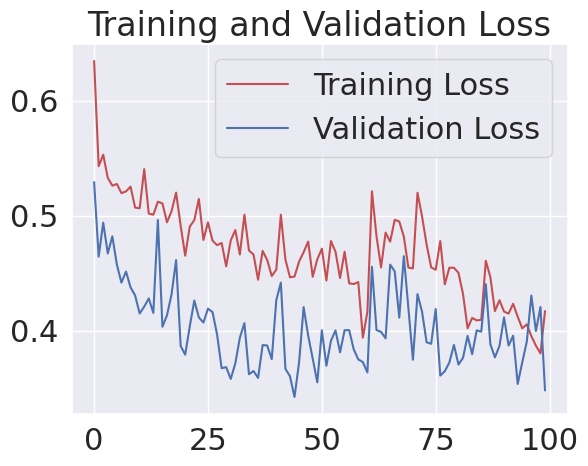

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')

plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
Y_pred=model.predict(test_imgs)
y_pred=np.argmax(Y_pred,axis=1)

print('Confusion Matrix')
cm=confusion_matrix(test_labels,y_pred)
print(cm)


print('Classification Report')

target_names=['malignant','normal benign']

print(classification_report(test_labels,y_pred,target_names=target_names))



5/5 [==============================] - 0s 10ms/step
Confusion Matrix
[[ 42   0]
 [114   0]]
Classification Report
               precision    recall  f1-score   support

    malignant       0.27      1.00      0.42        42
normal benign       0.00      0.00      0.00       114

     accuracy                           0.27       156
    macro avg       0.13      0.50      0.21       156
 weighted avg       0.07      0.27      0.11       156



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(109.44999999999997, 0.5, 'Predicted Values')

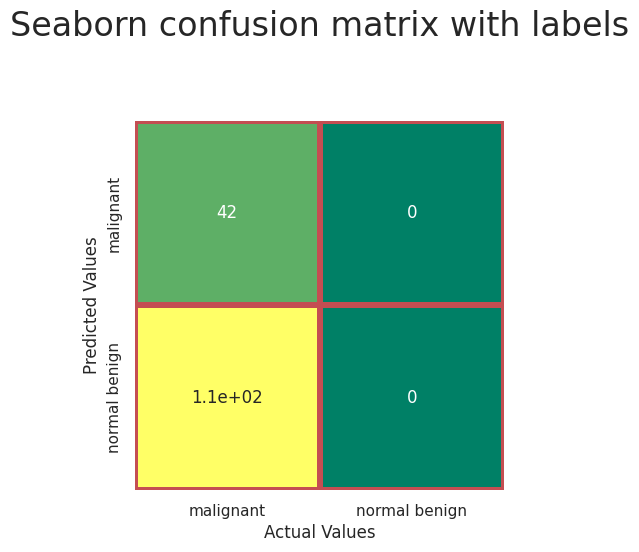

In [ ]:
import seaborn as sns
sns.set(font_scale=1.0)
ax=sns.heatmap(cm,annot=True, cmap='summer',cbar=False,linecolor='r',linewidth=3,square=True,xticklabels=target_names,yticklabels=target_names)

sns.set(font_scale=2.0)
ax.set_title('Seaborn confusion matrix with labels\n\n')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomFlip, RandomZoom
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1, l2


train_imgs,train_labels=next(train_loader)

train_imgs = np.expand_dims(train_imgs, axis=-1)

datagen = ImageDataGenerator(
    rotation_range=20,            # Random rotation
    width_shift_range=0.1,        # Random horizontal shift
    height_shift_range=0.1,       # Random vertical shift
    shear_range=0.2,              # Random shear
    zoom_range=0.2              # Random zoom
)

# Create LeNet-5 model for grayscale images
model_lenet = Sequential()
model_lenet.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model_lenet.add(MaxPooling2D(pool_size=(2, 2)))
model_lenet.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_lenet.add(MaxPooling2D(pool_size=(2, 2)))
model_lenet.add(Flatten())
model_lenet.add(Dense(256, activation='relu'))
model_lenet.add(Dropout(0.2))
model_lenet.add(Dense(64, activation='relu'))
model_lenet.add(Dense(32, activation='relu'))
model_lenet.add(Dense(16, activation='relu'))
model_lenet.add(Dropout(0.1))
model_lenet.add(Dense(1, activation='sigmoid'))

initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

checkpoint_filepath = '/content/drive/MyDrive/MedMNIST/breast_mnist/best_weights.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # Save the weights based on validation accuracy
    mode='max',
    save_best_only=True,     # Save only the best weights
    save_weights_only=True,  # Only save the model's weights, not the entire model
    verbose=1
)

def learning_rate_schedule(epoch, lr):
    # You can customize the learning rate schedule here
    # For example, reduce the learning rate by half every 10 epochs
    if epoch % 10 == 0 and epoch > 0:
        lr = lr / 2.0
    return lr

#learning_rate_callback = LearningRateScheduler(learning_rate_schedule)

model_lenet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
import tensorflow as tf

class LearningRateFinder(tf.keras.callbacks.Callback):
    def __init__(self, start_lr=1e-6, end_lr=10, steps_per_epoch=None, beta=0.98):
        super(LearningRateFinder, self).__init__()
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.steps_per_epoch = steps_per_epoch
        self.beta = beta
        self.lr_mult = (end_lr / start_lr) ** (1 / steps_per_epoch)
        self.avg_loss = 0
        self.best_loss = 1e9
        self.iteration = 0
        self.history = {}

    def on_train_begin(self, logs=None):
        self.iteration = 0
        self.avg_loss = 0
        self.best_loss = 1e9
        self.history = {}

    def on_batch_end(self, batch, logs=None):
        self.iteration += 1
        lr = self.start_lr * (self.lr_mult ** self.iteration)
        tf.keras.backend.set_value(self.model.optimizer.lr, lr)
        loss = logs['loss']
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smooth_loss = self.avg_loss / (1 - self.beta ** self.iteration)
        self.history.setdefault('lr', []).append(lr)
        self.history.setdefault('smooth_loss', []).append(smooth_loss)
        if self.iteration > 1 and smooth_loss > 4 * self.best_loss:
            self.model.stop_training = True
            return
        if smooth_loss < self.best_loss:
            self.best_loss = smooth_loss

# Create the Learning Rate Finder callback
lr_finder = LearningRateFinder(start_lr=1e-6, end_lr=10, steps_per_epoch=len(train_imgs)//32)


In [ ]:
train_generator = datagen.flow(train_imgs, train_labels, batch_size=32)


In [ ]:
# Train the model with the Learning Rate Finder
model_lenet.fit(
    train_generator,
    epochs=5,  # Short run for learning rate range estimation
    callbacks=[lr_finder],
)


Epoch 1/5
18/18 [==============================] - 2s 27ms/step - loss: 9.6812 - accuracy: 0.6117
Epoch 2/5
18/18 [==============================] - 0s 304us/step - loss: 24682.6484 - accuracy: 0.8438


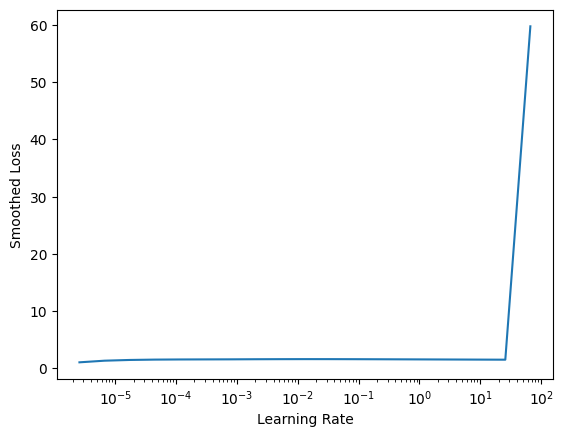

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lr_finder.history['lr'], lr_finder.history['smooth_loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Smoothed Loss')
plt.xscale('log')
plt.show()


In [ ]:
model_lenet.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 12, 12, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 256)               0         
                                                                 
 dense_69 (Dense)            (None, 120)             

In [ ]:
hist_lenet=model_lenet.fit(train_imgs,train_labels,validation_data=(val_imgs,val_labels),epochs=40,steps_per_epoch=5,callbacks=[model_checkpoint_callback])

Epoch 1/40
5/5 [==============================] - ETA: 0s - loss: 8894908416.0000 - accuracy: 0.6502
Epoch 1: val_accuracy improved from -inf to 0.26923, saving model to /content/drive/MyDrive/MedMNIST/breast_mnist/best_weights.h5
5/5 [==============================] - 1s 185ms/step - loss: 8894908416.0000 - accuracy: 0.6502 - val_loss: 39.5253 - val_accuracy: 0.2692
Epoch 2/40
4/5 [=======================>......] - ETA: 0s - loss: 34.7354 - accuracy: 0.4977
Epoch 2: val_accuracy improved from 0.26923 to 0.73077, saving model to /content/drive/MyDrive/MedMNIST/breast_mnist/best_weights.h5
5/5 [==============================] - 0s 67ms/step - loss: 40.3671 - accuracy: 0.5440 - val_loss: 63.7768 - val_accuracy: 0.7308
Epoch 3/40
5/5 [==============================] - ETA: 0s - loss: 37.0052 - accuracy: 0.5256
Epoch 3: val_accuracy did not improve from 0.73077
5/5 [==============================] - 0s 57ms/step - loss: 37.0052 - accuracy: 0.5256 - val_loss: 22.7379 - val_accuracy: 0.7308


KeyboardInterrupt: ignored

In [ ]:
model_lenet.save('/content/drive/MyDrive/MedMNIST/breast_mnist/model_lenet.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
import math


# Assuming you have the 'train_loader', 'test_loader', and 'val_loader' data loaders ready

# Define the simplified ResNet-18 variation
model_resnet18 = Sequential()

# Convolutional Block 1
model_resnet18.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model_resnet18.add(BatchNormalization())
model_resnet18.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_resnet18.add(BatchNormalization())
model_resnet18.add(MaxPooling2D(pool_size=(2, 2)))

# Residual Blocks
for _ in range(2):  # You can increase this number to add more residual blocks
    model_resnet18.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model_resnet18.add(BatchNormalization())
    model_resnet18.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model_resnet18.add(BatchNormalization())

# Convolutional Block 2
model_resnet18.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_resnet18.add(BatchNormalization())
model_resnet18.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model_resnet18.add(Flatten())
model_resnet18.add(Dense(128, activation='relu'))
model_resnet18.add(BatchNormalization())
model_resnet18.add(Dropout(0.5))  # Add Dropout layer after each block

model_resnet18.add(Dense(1, activation='sigmoid'))

checkpoint_filepath = '/content/drive/MyDrive/MedMNIST/breast_mnist/best_weights.h5'


model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # Save the weights based on validation accuracy
    mode='max',
    save_best_only=True,     # Save only the best weights
    save_weights_only=True,  # Only save the model's weights, not the entire model
    verbose=1
)

initial_learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)



def learning_rate_schedule(epoch, lr):
    # You can customize the learning rate schedule here
    # For example, reduce the learning rate by half every 10 epochs
    if epoch % 10 == 0 and epoch > 0:
        lr = lr / 2.0
    return lr

learning_rate_callback = LearningRateScheduler(learning_rate_schedule)

model_resnet18.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_resnet18.summary()

early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)





Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_49 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_76 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_50 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                     

In [ ]:
hist_resnet=model_resnet18.fit(train_imgs, train_labels,validation_data=(val_imgs,val_labels),epochs=50,callbacks=[learning_rate_callback,early_stopping_callback,model_checkpoint_callback])

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 0.9278 - accuracy: 0.5806
Epoch 1: val_accuracy improved from -inf to 0.71795, saving model to /content/drive/MyDrive/MedMNIST/breast_mnist/best_weights.h5
18/18 [==============================] - 38s 644ms/step - loss: 0.9278 - accuracy: 0.5806 - val_loss: 0.6152 - val_accuracy: 0.7179 - lr: 1.0000e-04
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 0.6051 - accuracy: 0.7253
Epoch 2: val_accuracy improved from 0.71795 to 0.73077, saving model to /content/drive/MyDrive/MedMNIST/breast_mnist/best_weights.h5
18/18 [==============================] - 13s 732ms/step - loss: 0.6051 - accuracy: 0.7253 - val_loss: 0.5851 - val_accuracy: 0.7308 - lr: 1.0000e-04
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 0.5132 - accuracy: 0.7619
Epoch 3: val_accuracy did not improve from 0.73077
18/18 [==============================] - 11s 617ms/step - loss: 0.5132 - accuracy: 0.7619 - val_loss: 0.57

In [ ]:
model_resnet18.save('/content/drive/MyDrive/MedMNIST/breast_mnist/model_resnet18.h5')

In [ ]:
from tensorflow.python.data.ops.options import model_pb2
from keras.models import Model, load_model
from keras.layers import Input, Average

model_1=load_model('/content/drive/MyDrive/MedMNIST/breast_mnist/model_lenet.h5')
model_1=Model(inputs=model_1.inputs,
              outputs=model_1.outputs,
              name='LeNet')

model_2=load_model('/content/drive/MyDrive/MedMNIST/breast_mnist/model_resnet18.h5')
model_2=Model(inputs=model_2.inputs,
              outputs=model_2.outputs,
              name='ResNet')

models=[model_1,model_2]
model_input=Input(shape=(28,28,1))
model_outputs=[model(model_input) for model in models]
ensemble_output=Average()(model_outputs)
ensemble_model=Model(inputs=model_input,outputs=ensemble_output,name='ensemble')

<Figure size 640x480 with 0 Axes>

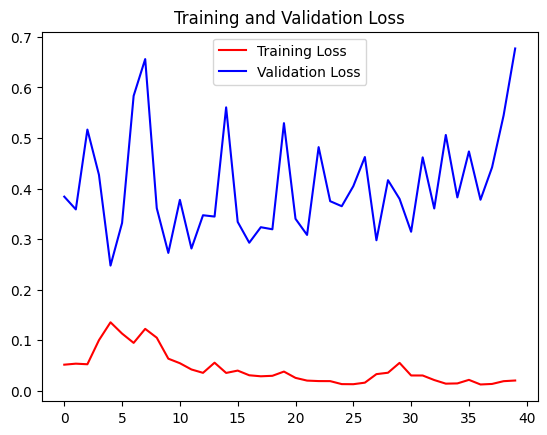

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt

epochs=range(len(acc))

plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')

plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

ensemble_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
ensemble_model.summary()

Model: "ensemble"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 LeNet (Functional)             (None, 1)            43661       ['input_1[0][0]']                
                                                                                                  
 ResNet (Functional)            (None, 1)            1064769     ['input_1[0][0]']                
                                                                                                  
 average (Average)              (None, 1)            0           ['LeNet[0][0]',                  
                                                                  'ResNet[0][0]']          

In [ ]:
history=ensemble_model.fit(train_imgs,train_labels,validation_data=(val_imgs,val_labels),epochs=40)

Epoch 1/40
18/18 [==============================] - 9s 484ms/step - loss: 0.0518 - accuracy: 0.9908 - val_loss: 0.3841 - val_accuracy: 0.8846
Epoch 2/40
18/18 [==============================] - 11s 614ms/step - loss: 0.0538 - accuracy: 0.9872 - val_loss: 0.3589 - val_accuracy: 0.8718
Epoch 3/40
18/18 [==============================] - 11s 623ms/step - loss: 0.0526 - accuracy: 0.9908 - val_loss: 0.5167 - val_accuracy: 0.8846
Epoch 4/40
18/18 [==============================] - 9s 480ms/step - loss: 0.1002 - accuracy: 0.9780 - val_loss: 0.4272 - val_accuracy: 0.8846
Epoch 5/40
18/18 [==============================] - 11s 611ms/step - loss: 0.1356 - accuracy: 0.9670 - val_loss: 0.2477 - val_accuracy: 0.8462
Epoch 6/40
18/18 [==============================] - 11s 613ms/step - loss: 0.1133 - accuracy: 0.9725 - val_loss: 0.3321 - val_accuracy: 0.8974
Epoch 7/40
18/18 [==============================] - 9s 479ms/step - loss: 0.0949 - accuracy: 0.9762 - val_loss: 0.5834 - val_accuracy: 0.8462
Ep

In [ ]:
ensemble_model.save('/content/drive/MyDrive/MedMNIST/breast_mnist/ensemble_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model_resnet18= load_model('/content/drive/MyDrive/MedMNIST/breast_mnist/model_resnet18.h5')

import pandas as pd

log_file_path = '/content/drive/MyDrive/MedMNIST/breast_mnist/logs/validation/events.out.tfevents.1689896057.d2a24ebbbcd7.230.3.v2'
training_history = pd.read_csv(log_file_path)

import matplotlib.pyplot as plt

epochs = range(1, len(training_history['accuracy']) + 1)

plt.plot(epochs, training_history['accuracy'], 'bo', label='Training Accuracy')
plt.plot(epochs, training_history['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, training_history['loss'], 'ro', label='Training Loss')
plt.plot(epochs, training_history['val_loss'], 'r', label='Validation Loss')

plt.title('Training and Validation Accuracy vs. Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.show()


UnicodeDecodeError: ignored

In [ ]:
import numpy as np
#train_labels=np.squeeze(train_labels)

In [ ]:
train_imgs,train_labels=next(train_loader)
train_labels.shape

(546, 1)

In [ ]:
test_imgs,test_labels=next(test_loader)

In [ ]:
import numpy as np
t#est_labels=np.squeeze(test_labels)

In [ ]:
test_labels.shape

(156, 1)

In [ ]:
test_dataset

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 156
    Root location: /root/.medmnist
    Split: test
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
Y_pred=ensemble_model.predict(test_imgs)
y_pred=np.argmax(Y_pred,axis=1)

print('Confusion Matrix')
cm=confusion_matrix(test_labels,y_pred)
print(cm)


print('Classification Report')

target_names=['malignant','normal benign']

print(classification_report(test_labels,y_pred,target_names=target_names))



5/5 [==============================] - 1s 109ms/step
Confusion Matrix
[[ 42   0]
 [114   0]]
Classification Report
               precision    recall  f1-score   support

    malignant       0.27      1.00      0.42        42
normal benign       0.00      0.00      0.00       114

     accuracy                           0.27       156
    macro avg       0.13      0.50      0.21       156
 weighted avg       0.07      0.27      0.11       156



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(109.44999999999997, 0.5, 'Predicted Values')

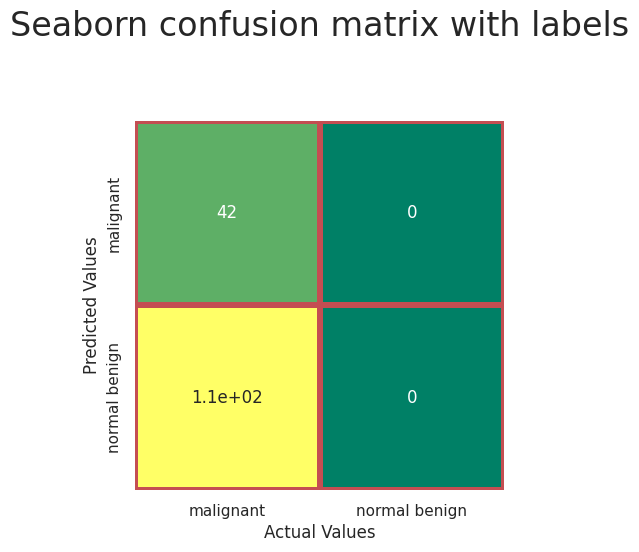

In [ ]:
import seaborn as sns
sns.set(font_scale=1.0)
ax=sns.heatmap(cm,annot=True, cmap='summer',cbar=False,linecolor='r',linewidth=3,square=True,xticklabels=target_names,yticklabels=target_names)

sns.set(font_scale=2.0)
ax.set_title('Seaborn confusion matrix with labels\n\n')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')